# Notebook dedicated to the data visualization for our RIMEL project
## Authors : 
- Fabien Airaud
- Axel Delille
- Yvann Ponce
- Apoorva Srinivas Appadoo
---

In [17]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict
import json, os

Load the data to visualize

In [19]:
def load_previous_result(file_path):
    with open(file_path, 'r') as file:
        results = json.load(file)
    return results

input_file = "output.json"
data = load_previous_result(input_file)

output_dir = "./diagram"
os.makedirs(output_dir, exist_ok=True)

Visualize the number of usage for each tool

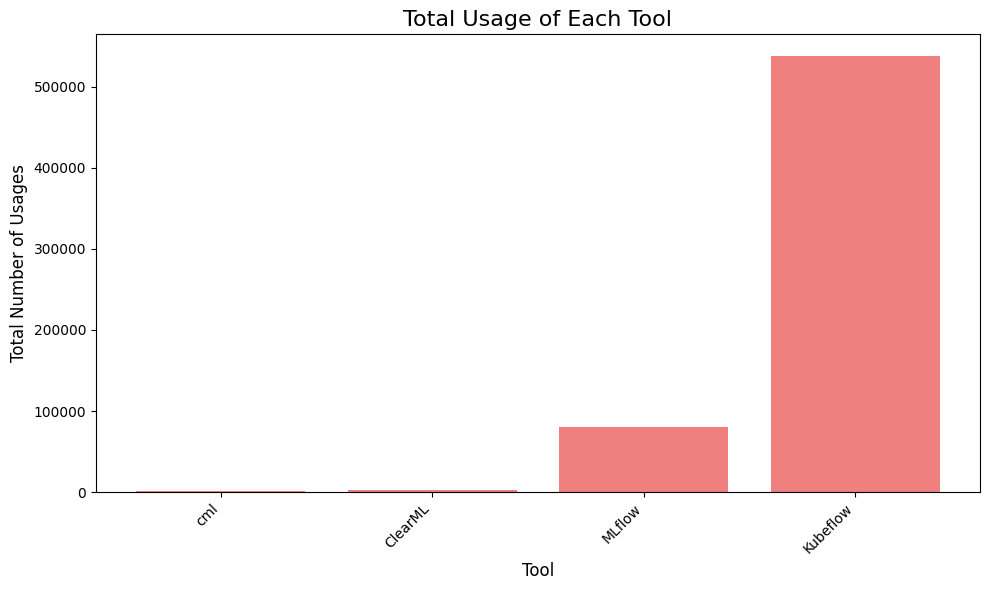

In [20]:
# Aggregate the total number of usages per tool
usage_by_tool = defaultdict(int)
for entry in data:
    usage_by_tool[entry['tool']] += entry['number']

# Prepare data for plotting
tools = list(usage_by_tool.keys())
total_usages = list(usage_by_tool.values())
output_path = os.path.join(output_dir, "total_usage_comparison.png")

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(tools, total_usages, color="lightcoral")
plt.title("Total Usage of Each Tool", fontsize=16)
plt.xlabel("Tool", fontsize=12)
plt.ylabel("Total Number of Usages", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_path)  # Save as PNG file
plt.show()

Visualize data usage for command in each tool

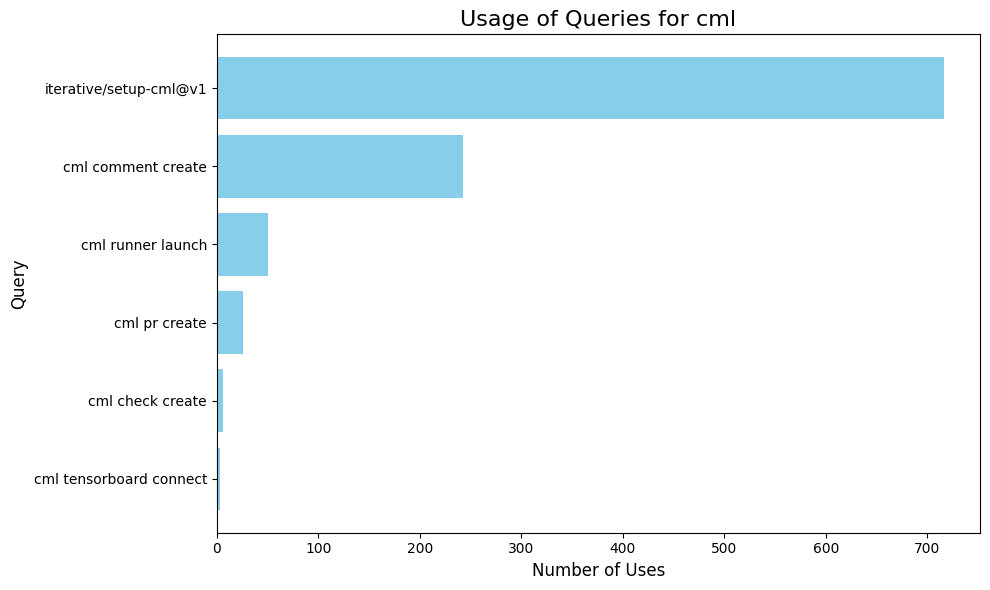

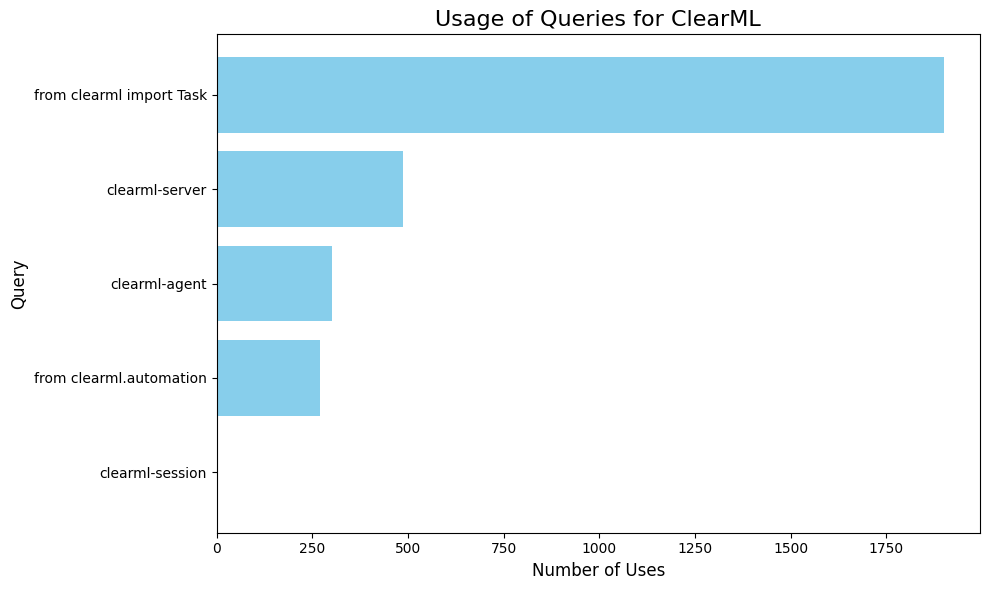

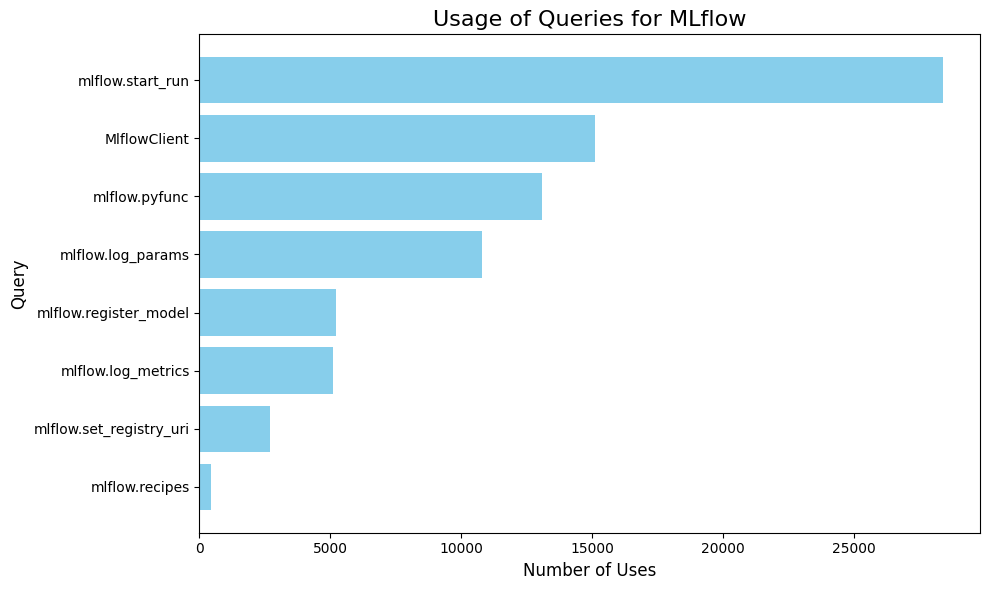

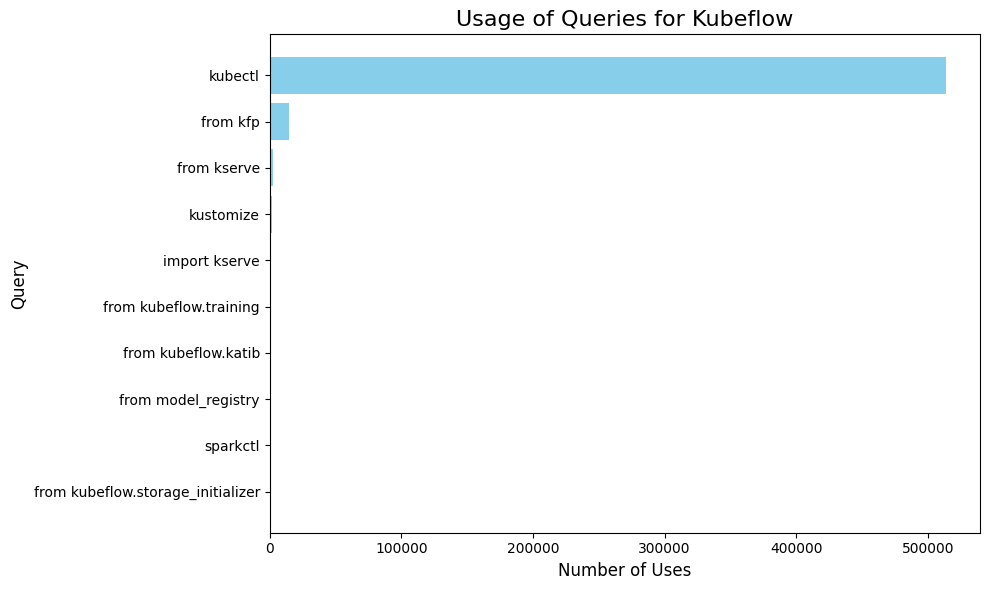

In [21]:
# Organize data by tool
data_by_tool = defaultdict(list)
for entry in data:
    data_by_tool[entry['tool']].append((entry['query'], entry['number']))

# Plot for each tool
for tool, queries in data_by_tool.items():
    # Sort queries by number of uses in descending order
    queries.sort(key=lambda x: x[1], reverse=True)
    queries_names, queries_numbers = zip(*queries)
    output_path = os.path.join(output_dir, f"{tool}_usage.png")
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(queries_names, queries_numbers, color="skyblue")
    plt.title(f"Usage of Queries for {tool}", fontsize=16)
    plt.xlabel("Number of Uses", fontsize=12)
    plt.ylabel("Query", fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.savefig(output_path)  # Save each plot as a PNG file
    plt.show()